# EfficientDet Inference 



<table align="left"><td>
  <a target="_blank"  href="https://github.com/google/automl/blob/master/efficientdet/tutorial.ipynb">
    <img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on github
  </a>
</td><td>
  <a target="_blank"  href="https://colab.sandbox.google.com/github/google/automl/blob/master/efficientdet/tutorial.ipynb">
    <img width=32px src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
</td></table>

### 0. Install

In [2]:
#@title
# Install tensorflow and pycocotools
!pip install tensorflow
!pip install pytype
# The default pycocotools doesn't work for python3: https://github.com/cocodataset/cocoapi/issues/49
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'

import os
import sys
import tensorflow.compat.v1 as tf

# Download source code.
if "efficientdet" not in os.getcwd():
  !git clone --depth 1 https://github.com/google/automl
  os.chdir('automl/efficientdet')
  sys.path.append('.')
else:
  !git pull

     |████████████████████████████████| 1.1MB 2.5MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Using cached https://files.pythonhosted.org/packages/cc/bf/32e5dd5cce6543374e4050a7292099402ab80787eddf3732810a55b37763/ninja-1.9.0.post1-py3-none-manylinux1_x86_64.whl
     |████████████████████████████████| 747kB 7.2MB/s 
  Created wheel for pytype: filename=pytype-2020.3.19-cp36-cp36m-linux_x86_64.whl size=1702183 sha256=15bff87fbf141aa0cf40287fa6fc4b43bbe7ccb052ddd1dcd1af03a543adcb63
  Stored in directory: /root/.cache/pip/wheels/8e/e0/d8/3c5a8ce3a2b9390d1a730761331fba8041e3ce7a3769129636
Successfully built pytype
  Created wheel for importlab: filename=importlab-0.5.1-py2.py3-none-any.whl size=21400 sha256=0fbe9f19d2a0f92e5993d759f700dbe7dc8ac442d3e88332f178cb112e136ee0
  Stored in directory: /root/.cache/pip/wheels/23/78/a9/42cd33ab2c683e45bdac8e313f311f7ad44f9590d521b3c2ff
Successfully built importl

In [3]:
MODEL = 'efficientdet-d0'  #@param
# Download checkpoint.
!wget https://storage.googleapis.com/cloud-tpu-checkpoints/efficientdet/coco/{MODEL}.tar.gz
!tar zxf {MODEL}.tar.gz
ckpt_path = os.path.join(os.getcwd(), MODEL)
print('Use model in {}'.format(ckpt_path))

--2020-03-27 03:51:17--  https://storage.googleapis.com/cloud-tpu-checkpoints/efficientdet/coco/efficientdet-d0.tar.gz
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.11.128, 2607:f8b0:400c:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.11.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28987228 (28M) [application/octet-stream]
Saving to: ‘efficientdet-d0.tar.gz’

efficientdet-d0.tar 100%[===================>]  27.64M   161MB/s    in 0.2s    

2020-03-27 03:51:17 (161 MB/s) - ‘efficientdet-d0.tar.gz’ saved [28987228/28987228]

Use model in /content/automl/efficientdet/efficientdet-d0


### Inference a single image.

In [4]:
# Image is from issue: https://github.com/google/automl/issues/27
image_url =  'https://user-images.githubusercontent.com/11736571/77320690-099af300-6d37-11ea-9d86-24f14dc2d540.png'#@param
image_name = 'img.png' #@param
!wget {image_url} -O img.png

import os
img_path = os.path.join(os.getcwd(), 'img.png')
img_out_dir = os.path.join(os.getcwd(), 'img_out')

if not os.path.exists(img_out_dir):
  os.mkdir(img_out_dir)

# Get the largest of height/width and round to 128.
import PIL
image_size = max(PIL.Image.open(img_path).size)  // 128 * 128

--2020-03-27 03:51:18--  https://user-images.githubusercontent.com/11736571/77320690-099af300-6d37-11ea-9d86-24f14dc2d540.png
Resolving user-images.githubusercontent.com (user-images.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to user-images.githubusercontent.com (user-images.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4080549 (3.9M) [image/png]
Saving to: ‘img.png’

img.png             100%[===================>]   3.89M  --.-KB/s    in 0.1s    

2020-03-27 03:51:19 (33.9 MB/s) - ‘img.png’ saved [4080549/4080549]



In [5]:
min_score_thresh = 0.2  #@param
max_boxes_to_draw = 100  #@param
line_thickness = 4  #@param

# Approach 1: use model_inspect.
# !python model_inspect.py --runmode=infer --model_name={MODEL} --ckpt_path={ckpt_path} --input_image={img_path} --output_image_dir={img_out_dir}

# Approach 2: call InferenceDriver
import inference
tf.reset_default_graph()
driver = inference.InferenceDriver(MODEL, ckpt_path, image_size=image_size)
driver.inference(img_path,
                 img_out_dir,
                 min_score_thresh=min_score_thresh,
                 max_boxes_to_draw=max_boxes_to_draw,
                 line_thickness=line_thickness)

Instructions for updating:
Use `tf.cast` instead.
Instructions for updating:
Use `tf.cast` instead.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
Use `tf.compat.v1.graph_util.tensor_shape_from_node_def_name`


Instructions for updating:
Use `tf.compat.v1.graph_util.tensor_shape_from_node_def_name`


Instructions for updating:
Use `tf.keras.layers.Conv2D` instead.


Instructions for updating:
Use `tf.keras.layers.Conv2D` instead.


Instructions for updating:
Please use `layer.__call__` method instead.


Instructions for updating:
Please use `layer.__call__` method instead.


Instructions for updating:
Use keras.layers.MaxPooling2D instead.


Instructions for updating:
Use keras.layers.MaxPooling2D instead.


Instructions for updating:
Use `tf.keras.layers.SeparableConv2D` instead.


Instructions for updating:
Use `tf.keras.layers.SeparableConv2D` instead.


Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.


Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.


INFO:tensorflow:Restoring parameters from /content/automl/efficientdet/efficientdet-d0/model


INFO:tensorflow:Restoring parameters from /content/automl/efficientdet/efficientdet-d0/model


Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


Instructions for updating:
tf.py_func is deprecated in TF V2. Instead, there are two
    options available in V2.
    - tf.py_function takes a python function which manipulates tf eager
    tensors instead of numpy arrays. It's easy to convert a tf eager tensor to
    an ndarray (just call tensor.numpy()) but having access to eager tensors
    means `tf.py_function`s can use accelerators such as GPUs as well as
    being differentiable using a gradient tape.
    - tf.numpy_function maintains the semantics of the deprecated tf.py_func
    (it is not differentiable, and manipulates numpy arrays). It drops the
    stateful argument making all functions stateful.
    


Instructions for updating:
tf.py_func is deprecated in TF V2. Instead, there are two
    options available in V2.
    - tf.py_function takes a python function which manipulates tf eager
    tensors instead of numpy arrays. It's easy to convert a tf eager tensor to
    an ndarray (just call tensor.numpy()) but having access to eager tensors
    means `tf.py_function`s can use accelerators such as GPUs as well as
    being differentiable using a gradient tape.
    - tf.numpy_function maintains the semantics of the deprecated tf.py_func
    (it is not differentiable, and manipulates numpy arrays). It drops the
    stateful argument making all functions stateful.
    


[array([[ 0.00000000e+00,  6.12501282e+02,  1.30521765e+03,
          8.93604187e+02,  1.63170959e+03,  9.00829613e-01,
          3.00000000e+00],
        [ 0.00000000e+00,  8.96843079e+02,  1.24571777e+03,
          1.08068433e+03,  1.58207617e+03,  8.75486076e-01,
          3.00000000e+00],
        [ 0.00000000e+00,  6.43753906e+02,  1.56991956e+03,
          9.05289551e+02,  1.89877478e+03,  8.71113539e-01,
          3.00000000e+00],
        [ 0.00000000e+00,  6.31618530e+02,  2.11501083e+02,
          8.34775513e+02,  4.72736694e+02,  8.48226309e-01,
          3.00000000e+00],
        [ 0.00000000e+00,  3.76811584e+02,  1.02450574e+03,
          4.69811707e+02,  1.11626575e+03,  8.47975492e-01,
          3.00000000e+00],
        [ 0.00000000e+00,  4.81160339e+02,  1.17304285e+03,
          6.08219055e+02,  1.31329822e+03,  8.39665473e-01,
          3.00000000e+00],
        [ 0.00000000e+00,  7.47446594e+02,  1.23045715e+03,
          8.69968079e+02,  1.31947156e+03,  8.19239914e-01

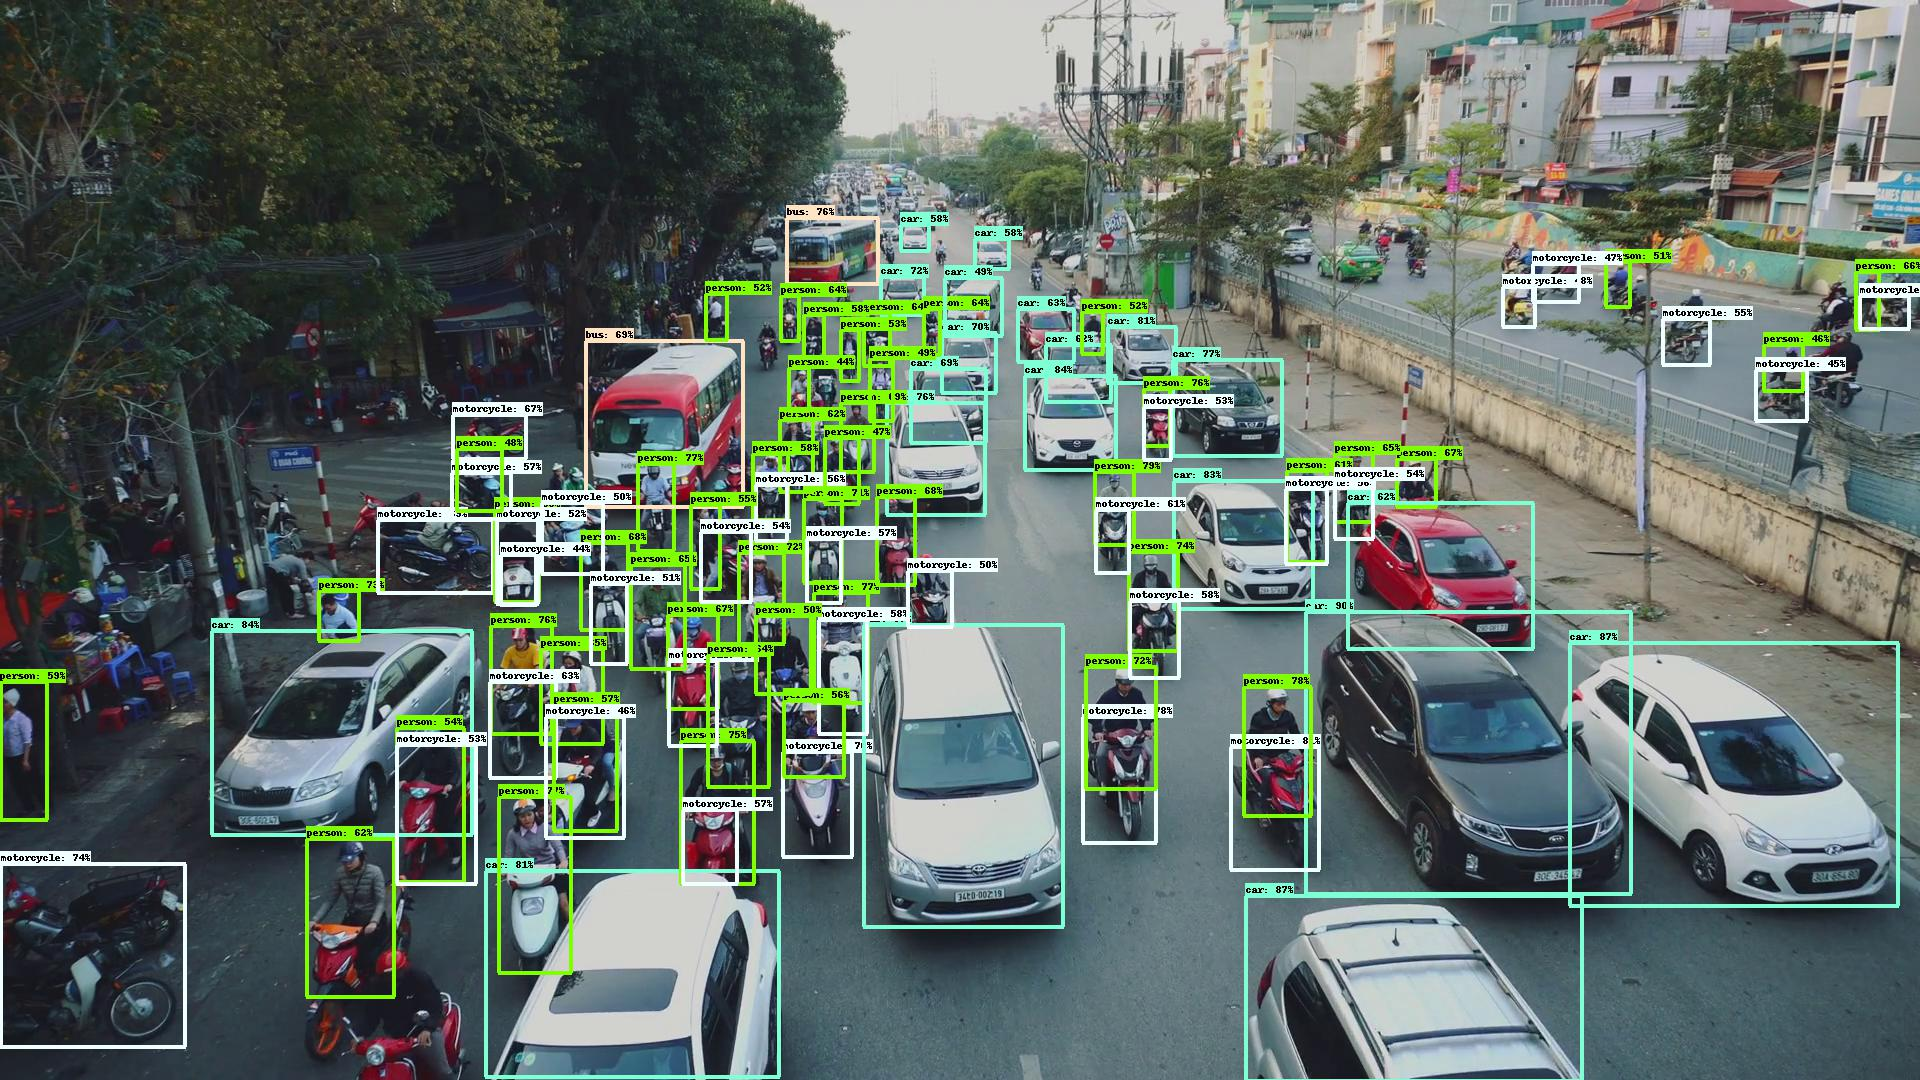

In [6]:
from IPython import display
display.display(display.Image(os.path.join(img_out_dir, '0.jpg')))

## Run COCO Evaluation

In [7]:
!wget http://images.cocodataset.org/zips/val2017.zip
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip
!unzip val2017.zip
!unzip annotations_trainval2017.zip

Streaming output truncated to the last 5000 lines.
 extracting: val2017/000000320425.jpg  
 extracting: val2017/000000481404.jpg  
 extracting: val2017/000000314294.jpg  
 extracting: val2017/000000335328.jpg  
 extracting: val2017/000000513688.jpg  
 extracting: val2017/000000158548.jpg  
 extracting: val2017/000000132116.jpg  
 extracting: val2017/000000415238.jpg  
 extracting: val2017/000000321333.jpg  
 extracting: val2017/000000081738.jpg  
 extracting: val2017/000000577584.jpg  
 extracting: val2017/000000346905.jpg  
 extracting: val2017/000000433980.jpg  
 extracting: val2017/000000228144.jpg  
 extracting: val2017/000000041872.jpg  
 extracting: val2017/000000117492.jpg  
 extracting: val2017/000000368900.jpg  
 extracting: val2017/000000376900.jpg  
 extracting: val2017/000000352491.jpg  
 extracting: val2017/000000330790.jpg  
 extracting: val2017/000000384850.jpg  
 extracting: val2017/000000032735.jpg  
 extracting: val2017/000000197004.jpg  
 extracting: val2017/00000052

In [8]:
# Convert to tfrecord
!mkdir tfrecrod
!PYTHONPATH=".:$PYTHONPATH"  python dataset/create_coco_tfrecord.py \
      --image_dir=val2017 \
      --caption_annotations_file=annotations/captions_val2017.json \
      --output_file_prefix=tfrecord/val \
      --num_shards=32

I0327 03:52:55.445909 139727612876672 create_coco_tfrecord.py:286] writing to output path: tfrecord/val
I0327 03:52:55.520943 139727612876672 create_coco_tfrecord.py:238] Building caption index.
I0327 03:52:55.527304 139727612876672 create_coco_tfrecord.py:250] 0 images are missing captions.
I0327 03:52:55.572254 139727612876672 create_coco_tfrecord.py:324] On image 0 of 5000
I0327 03:52:55.744751 139727612876672 create_coco_tfrecord.py:324] On image 100 of 5000
I0327 03:52:55.853331 139727612876672 create_coco_tfrecord.py:324] On image 200 of 5000
I0327 03:52:55.964886 139727612876672 create_coco_tfrecord.py:324] On image 300 of 5000
I0327 03:52:56.166391 139727612876672 create_coco_tfrecord.py:324] On image 400 of 5000
I0327 03:52:56.302914 139727612876672 create_coco_tfrecord.py:324] On image 500 of 5000
I0327 03:52:56.451859 139727612876672 create_coco_tfrecord.py:324] On image 600 of 5000
I0327 03:52:56.592391 139727612876672 create_coco_tfrecord.py:324] On image 700 of 5000
I0327

In [9]:
# Evalute on validation set
!python main.py --mode=eval  \
    --model_name={MODEL}  --model_dir={ckpt_path}  \
    --validation_file_pattern=tfrecord/val*  \
    --val_json_file=annotations/instances_val2017.json  \
    --hparams="use_bfloat16=false" --use_tpu=False

Instructions for updating:
non-resource variables are not supported in the long term

W0327 03:53:16.748640 140719192303488 module_wrapper.py:138] From main.py:214: The name tf.estimator.tpu.TPUConfig is deprecated. Please use tf.compat.v1.estimator.tpu.TPUConfig instead.


W0327 03:53:16.748900 140719192303488 module_wrapper.py:138] From main.py:219: The name tf.estimator.tpu.InputPipelineConfig is deprecated. Please use tf.compat.v1.estimator.tpu.InputPipelineConfig instead.


W0327 03:53:16.749113 140719192303488 module_wrapper.py:138] From main.py:222: The name tf.estimator.tpu.RunConfig is deprecated. Please use tf.compat.v1.estimator.tpu.RunConfig instead.

I0327 03:53:16.749345 140719192303488 main.py:234] {'name': 'efficientdet-d0', 'image_size': 512, 'input_rand_hflip': True, 'train_scale_min': 0.1, 'train_scale_max': 2.0, 'autoaugment_policy': None, 'num_classes': 90, 'skip_crowd_during_training': True, 'min_level': 3, 'max_level': 7, 'num_scales': 3, 'aspect_ratios': [(1.0, 